In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part1.csv')
df2 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part2.csv')
df3 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part3.csv')
df4 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part4.csv')
df5 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part5.csv')
df6 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part6.csv')
df7 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part7.csv')

combined_df = pd.concat([df, df2, df3, df4, df5, df6, df7])

No NULL values but certain dimensions have 0 inside, not sure if intended

In [5]:
combined_df.describe()
combined_df.dtypes

NLOS       float64
RANGE      float64
FP_IDX     float64
FP_AMP1    float64
FP_AMP2    float64
            ...   
CIR1011    float64
CIR1012    float64
CIR1013    float64
CIR1014    float64
CIR1015    float64
Length: 1031, dtype: object

In [12]:
non_float_columns = combined_df.select_dtypes(exclude=['float']).columns
non_float_columns

Index([], dtype='object')

Plotting correlation heatmap for feature reduction

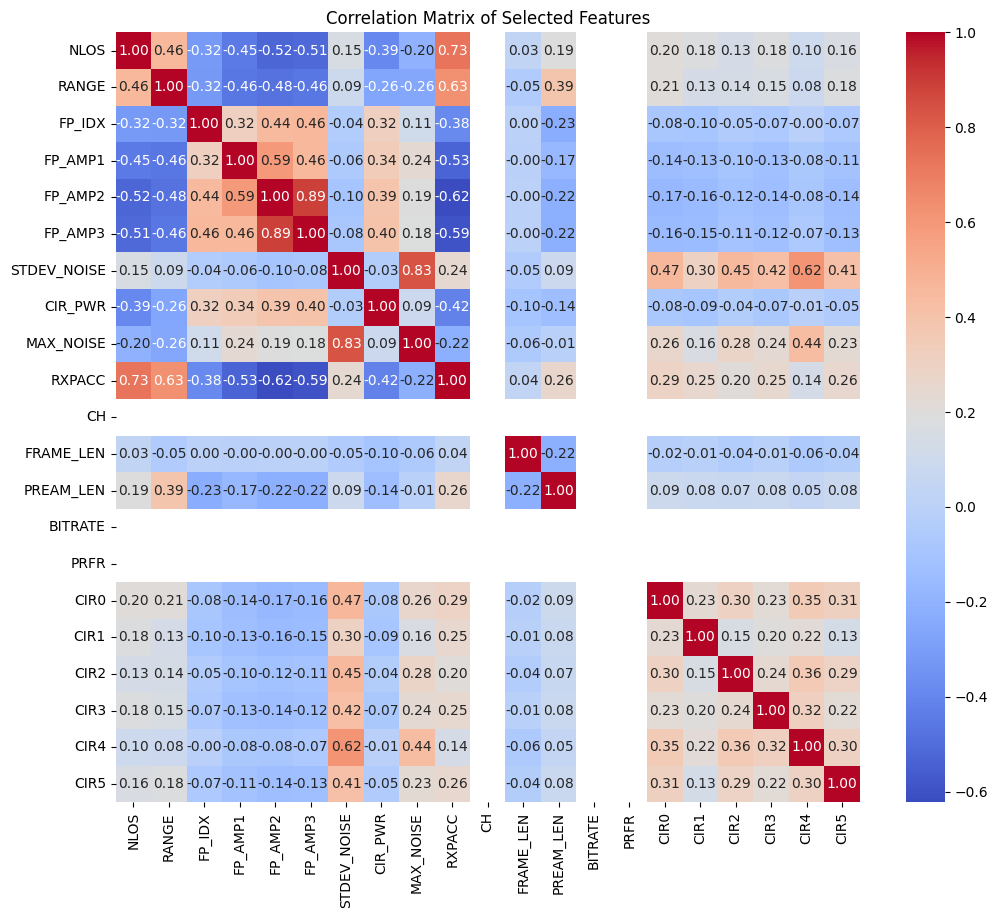

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = combined_df.columns[:21]
correlation_matrix = combined_df[selected_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier

X = combined_df.drop('NLOS', axis=1)
y = combined_df['NLOS']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame based on feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
feature_importance_df.head(20)

,Feature,Importance
8,RXPACC,0.102672
4,FP_AMP3,0.032590
7,MAX_NOISE,0.029055
0,RANGE,0.028144
6,CIR_PWR,0.022220
3,FP_AMP2,0.020722
2,FP_AMP1,0.020462
1,FP_IDX,0.015731
755,CIR741,0.015221
754,CIR740,0.008227


Based on correlation matrix and feature importance table, the following main features are deemed important and kept

1. RXPACC	
2. FP_AMP3	
3. MAX_NOISE	
4. RANGE	
5. CIR_PWR	
6. FP_AMP2	
7. FP_AMP1	
8. FP_IDX
9. CIR (Tentative due to high dimensions, not sure whether to perform feature reduction)

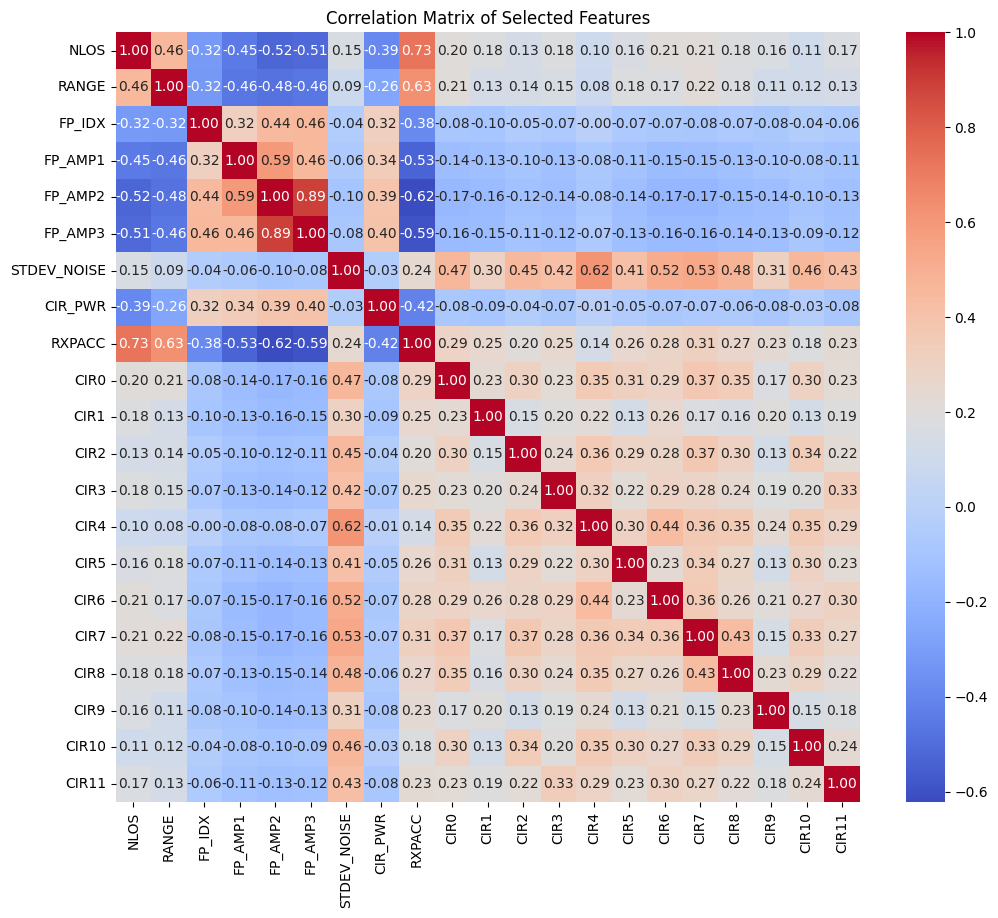

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

new_df = combined_df.drop(['MAX_NOISE','CH','FRAME_LEN','PREAM_LEN','BITRATE','PRFR'], axis=1)

selected_features = new_df.columns[:21]
correlation_matrix = new_df[selected_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

Based on PCA, we reduce the number of dimensions to keep 95% variance of the data

As shown in the results, 1024 dimensions has been reduced to 866 dimensions

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
X = new_df
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95) # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# The amount of variance that each principal component explains
variance_explained = pca.explained_variance_ratio_

# The cumulative variance explained by the principal components
cumulative_variance_explained = np.cumsum(variance_explained)

# The number of components
num_components = pca.n_components_

(num_components, cumulative_variance_explained)

(866,
 array([0.21426684, 0.25594665, 0.27551578, 0.29037165, 0.29946925,
        0.30796768, 0.31484205, 0.32029463, 0.32533343, 0.32991699,
        0.33377579, 0.33711974, 0.34018134, 0.34293197, 0.34557156,
        0.34797177, 0.35030619, 0.352484  , 0.35443253, 0.35629691,
        0.35805672, 0.35973126, 0.36130769, 0.36285857, 0.36436594,
        0.36577453, 0.36715413, 0.36850692, 0.36983914, 0.37114554,
        0.37241633, 0.37368313, 0.37492624, 0.37615627, 0.37738221,
        0.37855896, 0.37973189, 0.38087912, 0.38201165, 0.38314046,
        0.38425759, 0.38536482, 0.38646655, 0.38755245, 0.38863517,
        0.38971409, 0.39078907, 0.39185809, 0.39292034, 0.39398163,
        0.39504145, 0.39608961, 0.39713378, 0.3981757 , 0.39921303,
        0.40024836, 0.40128002, 0.40230834, 0.40333231, 0.40435143,
        0.40536993, 0.40638495, 0.40739642, 0.40840414, 0.40941053,
        0.41041459, 0.41141535, 0.41241198, 0.41340794, 0.4144027 ,
        0.4153945 , 0.41638296, 0.4173697 

Explained variance (the actual eigenvalues (variance)):
 [219.41446526  42.68114615  20.03926235  15.21277262   9.31616851
   8.70259716   7.03952087   5.58357551   5.15985279   4.69368414
   3.95150384   3.42428353   3.13514913   2.81671555   2.70300179
   2.4578781    2.39050034   2.23013681   1.99534002   1.90916664
   1.80209086   1.71477124   1.61429921   1.58814137   1.54358199
   1.44242872   1.41274356   1.38529647   1.36422236   1.33778063
   1.30132221   1.29723528   1.27297698   1.2595754    1.25539301
   1.20502076   1.20110932   1.17479795   1.15973108   1.15593472
   1.14396583   1.13383427   1.12820029   1.11198372   1.1087342
   1.10483671   1.10080682   1.09469935   1.08777732   1.08677787
   1.08528108   1.07335107   1.06924762   1.06695102   1.06225464
   1.06020351   1.05644091   1.05302428   1.04857056   1.04360754
   1.04297217   1.03940689   1.03576627   1.03192445   1.03057568
   1.02818179   1.0247967    1.02057506   1.01988973   1.01865367
   1.01563441   1.01

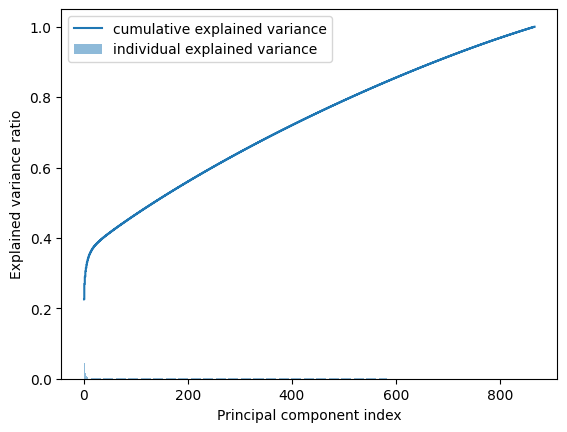

In [9]:
# Explained variance is the variance explained by each of the principal components (eigenvectors)
# It can be represented as a function of ratio of related eigenvalue and sum of eigenvalues of all eigenvectors

# calculate cumulative sum of explained variances
print("Explained variance (the actual eigenvalues (variance)):\n", pca.explained_variance_)

tot = sum(pca.explained_variance_)
print("Total variance:\n", tot)

var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
print("Variance Ratio:\n", var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative ratio:\n", cum_var_exp)

# plot explained variances
plt.bar(range(1, num_components + 1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, num_components + 1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

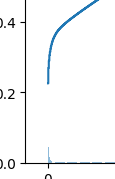

From the chart shown, the main features 8 features we have identified accounts for roughly 0.4 of the variance

Afterwards, the remaning components are all CIR dimensions that eventually add up the variance to 1.0

From this, it may be possible to perform aggregation or some sort to the CIR dimensions in order to further reduce dimensions

************************************************************************************************************************************************************************
************************************************************************************************************************************************************************
************************************************************************************************************************************************************************
************************************************************************************************************************************************************************
************************************************************************************************************************************************************************

!!!Testing aggregation for FP_AMP 1 2 3!!!

In [18]:
new_df['FP_AMP_AVG'] = new_df[['FP_AMP1', 'FP_AMP2', 'FP_AMP3']].mean(axis=1)

average_df = new_df.drop(['FP_AMP1', 'FP_AMP2', 'FP_AMP3'], axis=1)

average_df.head()

,RANGE,FP_IDX,STDEV_NOISE,CIR_PWR,RXPACC,CIR0,CIR1,CIR2,CIR3,CIR4,...,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015,FP_AMP_AVG
0,3.90,745.0,64.0,11855.0,611.0,129.0,312.0,331.0,141.0,160.0,...,458.0,183.0,158.0,198.0,87.0,296.0,505.0,307.0,0.0,13512.666667
1,0.66,749.0,64.0,18968.0,447.0,117.0,163.0,199.0,136.0,142.0,...,334.0,290.0,228.0,187.0,213.0,202.0,89.0,103.0,0.0,7421.333333
2,7.86,746.0,60.0,14699.0,723.0,433.0,240.0,233.0,81.0,143.0,...,373.0,224.0,174.0,124.0,329.0,207.0,96.0,218.0,0.0,4357.666667
3,3.48,750.0,76.0,8748.0,1024.0,466.0,247.0,407.0,225.0,279.0,...,173.0,198.0,160.0,434.0,397.0,290.0,155.0,342.0,256.0,7602.666667
4,1.19,746.0,68.0,11380.0,276.0,259.0,239.0,57.0,19.0,88.0,...,209.0,242.0,296.0,87.0,178.0,314.0,247.0,292.0,256.0,15999.333333


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
X = average_df
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95) # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# The amount of variance that each principal component explains
variance_explained = pca.explained_variance_ratio_

# The cumulative variance explained by the principal components
cumulative_variance_explained = np.cumsum(variance_explained)

# The number of components
num_components = pca.n_components_

(num_components, cumulative_variance_explained)

(865,
 array([0.21457676, 0.25633688, 0.27593992, 0.2905281 , 0.2996233 ,
        0.30807781, 0.31491658, 0.32037286, 0.32537672, 0.32991071,
        0.33365536, 0.33699011, 0.34001719, 0.34277232, 0.34541333,
        0.34781507, 0.35015342, 0.35232607, 0.35426695, 0.35612114,
        0.35786979, 0.35953577, 0.36111314, 0.36266419, 0.36416375,
        0.36557469, 0.36694793, 0.3683028 , 0.36963762, 0.37094371,
        0.37221688, 0.37348228, 0.37472773, 0.3759595 , 0.37718413,
        0.37836207, 0.37952738, 0.38067643, 0.3818105 , 0.38293333,
        0.38405236, 0.38515842, 0.3862572 , 0.38734229, 0.3884244 ,
        0.38950458, 0.39057595, 0.39164546, 0.39270877, 0.39377199,
        0.39482869, 0.39587858, 0.3969245 , 0.39796795, 0.39900688,
        0.40004256, 0.40107435, 0.40210304, 0.40312749, 0.40414837,
        0.4051663 , 0.4061803 , 0.40719329, 0.40820282, 0.40921088,
        0.4102161 , 0.41121841, 0.41221622, 0.41321289, 0.41420785,
        0.41520082, 0.41619072, 0.41717936

Testing CIR feature creation for new dimensions